In [11]:
import torch, torchaudio
import librosa, librosa.display
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
track_ids_str = open("data/fma_small_track_ids.txt", "r").readline()
track_ids = ast.literal_eval(track_ids_str)

tracks = pd.read_csv("data/fma_metadata/tracks.csv", index_col=0, header=[0, 1])
tracks = tracks[("track")].loc[track_ids]
train_tracks = tracks.sample(frac=0.8)
test_tracks = tracks.drop(train_tracks.index)

all_genres = list(set(tracks["genre_top"]))

del track_ids, track_ids_str, tracks

In [13]:
def get_waveform(track_id):
    try:
        padded_num = f"{track_id:06}"
        waveform, sr = torchaudio.load(f"data/fma_small/{padded_num[0:3]}/{padded_num}.mp3")
        window_size = 5000
        n_windows = int(waveform[0].shape[0] / window_size)
        averaged_abs_waveform = np.abs(waveform[0][:n_windows * window_size].reshape(n_windows, window_size))

        return averaged_abs_waveform.mean(dim=1)
    except Exception as e:
        print(e)
        print(f"TRACK LOADING DIAGNOSTIC: Error in loading track id: {track_id}")
        return torch.Tensor()

/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/cor

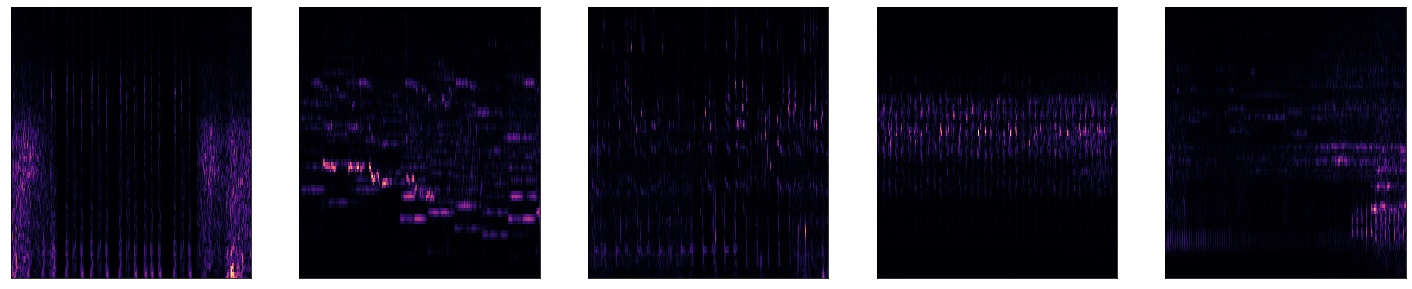

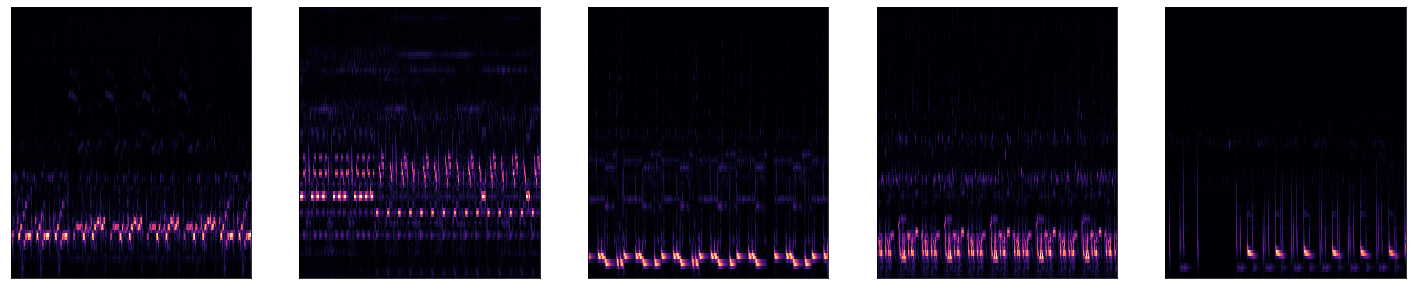

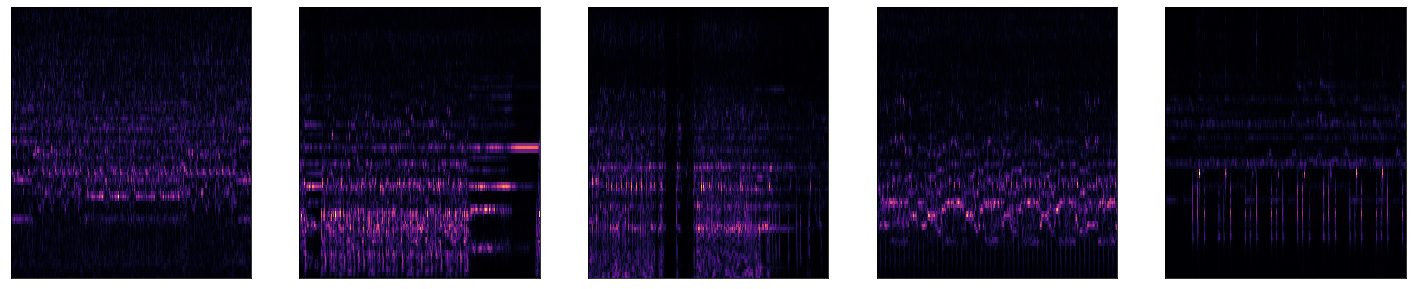

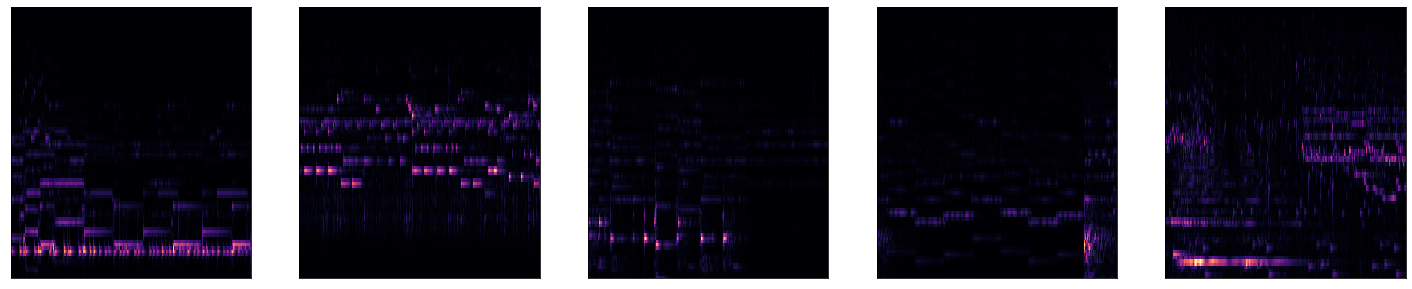

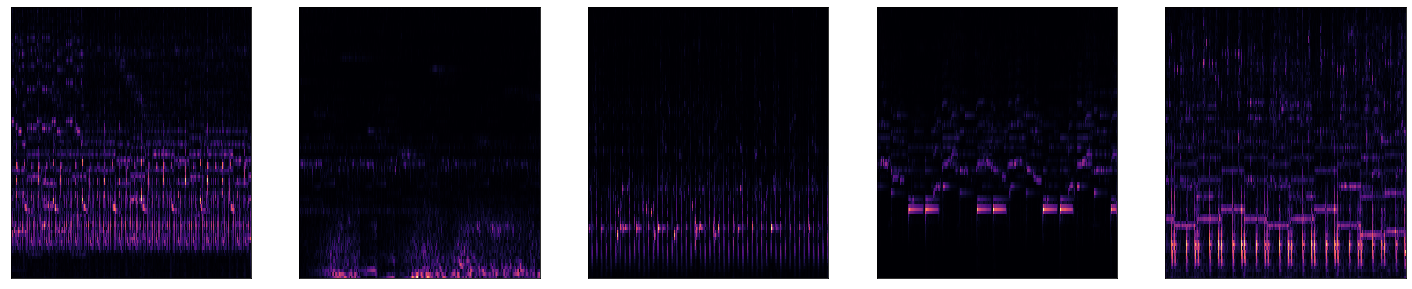

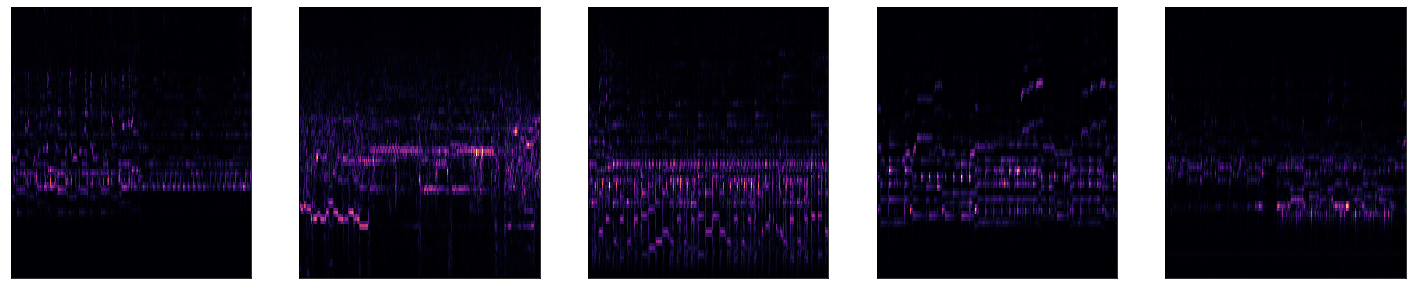

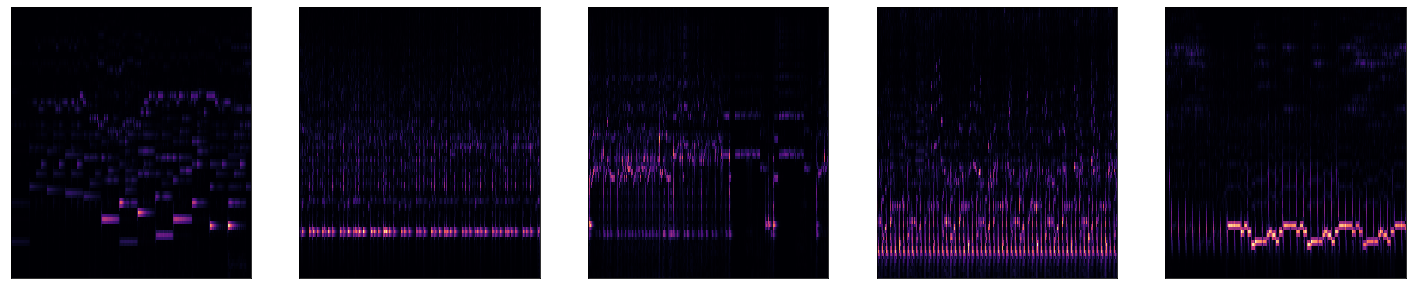

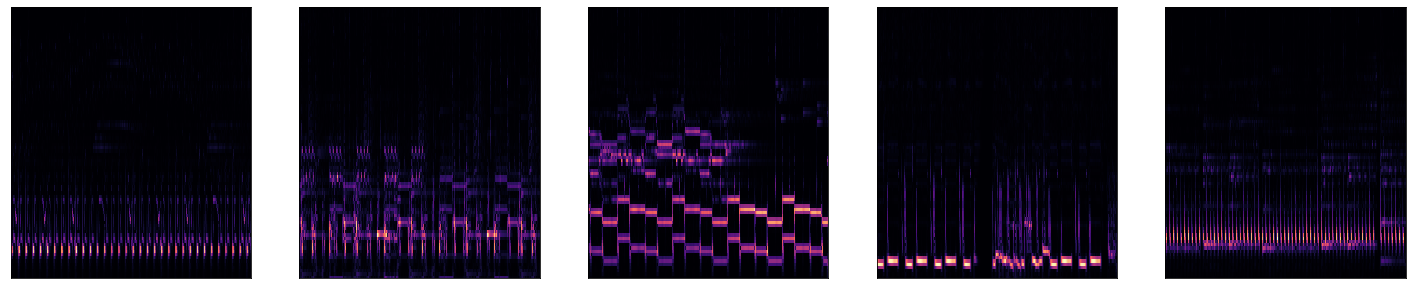

In [30]:
for genre in all_genres:
    track_ids = train_tracks[train_tracks["genre_top"] == genre].sample(5).index.tolist()
    plt.figure(figsize=(25, 5))
    for idx, id in enumerate(track_ids):
        plt.subplot(1, 5, idx + 1)
        padded_num = f"{id:06}"
        waveform, sr = librosa.load(f"data/fma_small/{padded_num[0:3]}/{padded_num}.mp3")
        cqt = np.abs(librosa.cqt(waveform, sr=sr, hop_length=512))
        librosa.display.specshow(cqt)

In [31]:
waveform, sr = librosa.load("data/fma_small/000/000211.mp3", res_type="kaiser_fast")
cqt = np.abs(librosa.cqt(waveform, sr=sr, hop_length=512, bins_per_octave=12, n_bins=7*12))
# print(cqt.shape)

# plt.figure(figsize=(10, 7))
# plt.subplot(1, 1, 1)
# librosa.display.specshow(cqt)

np.savetxt("test.csv", np.around(cqt, 5), delimiter=',')

/home/yijerloh/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


wow
